<a href="https://colab.research.google.com/github/maffant20/Assignment-5/blob/main/Learning_Rate_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

#Load Data
np.random.seed(6) #For reproducibility
(X_train2, Y_train2),(X_test, Y_test) = cifar10.load_data()

#Dataset characteristics
print('Training Images Size: {}'.format(X_train2.shape))
print(X_train2[0].shape)

Training Images Size: (50000, 32, 32, 3)
(32, 32, 3)


In [35]:
# X= np.concatenate((X_train,X_test),axis=0)
# Y =  np.concatenate((Y_train,Y_test),axis=0)
# print(X.shape)
# print(Y.shape)
# np.random.seed(6)
# X_train, X_val, X_test = np.split(X.sample(frac=1), [int(0.6*len(X)),int(0.8*len(X))])

# Y_train, Y_val, Y_test = np.split(Y.sample(frac=1), [int(0.6*len(Y)),int(0.8*len(Y))])


In [36]:
idx = (Y_train2 == 0).reshape(X_train2.shape[0])
filtered_images_0 = X_train2[idx]
X_tr0 = filtered_images_0 [0:4000]
X_val0 = filtered_images_0[4000:5000]
Y_0 = Y_train2[idx]
Y_tr0 = Y_0[0:4000]
Y_val0 = Y_0[4000:5000]

idx1 = (Y_train2 == 1).reshape(X_train2.shape[0])
filtered_images_1 = X_train2[idx1]
X_tr1 = filtered_images_1 [0:4000]
X_val1 = filtered_images_1[4000:5000]
Y_1 = Y_train2[idx1]
Y_tr1 = Y_1[0:4000]
Y_val1 = Y_1[4000:5000]



idx2 = (Y_train2 == 2).reshape(X_train2.shape[0])
filtered_images_2 = X_train2[idx2]
X_tr2 = filtered_images_2 [0:4000]
X_val2 = filtered_images_2[4000:5000]
Y_2 = Y_train2[idx2]
Y_tr2 = Y_2[0:4000]
Y_val2 = Y_2[4000:5000]

idx3 = (Y_train2 == 3).reshape(X_train2.shape[0])
filtered_images_3 = X_train2[idx3]
X_tr3 = filtered_images_3 [0:4000]
X_val3 = filtered_images_3[4000:5000]
Y_3 = Y_train2[idx3]
Y_tr3 = Y_3[0:4000]
Y_val3 = Y_3[4000:5000]

idx4 = (Y_train2 == 4).reshape(X_train2.shape[0])
filtered_images_4 = X_train2[idx4]
X_tr4 = filtered_images_4 [0:4000]
X_val4 = filtered_images_4[4000:5000]
Y_4 = Y_train2[idx4]
Y_tr4 = Y_4[0:4000]
Y_val4 = Y_4[4000:5000]

idx5 = (Y_train2 == 5).reshape(X_train2.shape[0])
filtered_images_5 = X_train2[idx5]
X_tr5 = filtered_images_5 [0:4000]
X_val5 = filtered_images_5[4000:5000]
Y_5 = Y_train2[idx5]
Y_tr5 = Y_5[0:4000]
Y_val5 = Y_5[4000:5000]

idx6 = (Y_train2 == 6).reshape(X_train2.shape[0])
filtered_images_6 = X_train2[idx6]
X_tr6 = filtered_images_6 [0:4000]
X_val6 = filtered_images_6[4000:5000]
Y_6 = Y_train2[idx6]
Y_tr6 = Y_6[0:4000]
Y_val6 = Y_6[4000:5000]

idx7 = (Y_train2 == 7).reshape(X_train2.shape[0])
filtered_images_7 = X_train2[idx7]
X_tr7 = filtered_images_7 [0:4000]
X_val7 = filtered_images_7[4000:5000]
Y_7 = Y_train2[idx7]
Y_tr7 = Y_7[0:4000]
Y_val7 = Y_7[4000:5000]

idx8 = (Y_train2 == 8).reshape(X_train2.shape[0])
filtered_images_8 = X_train2[idx8]
X_tr8 = filtered_images_8 [0:4000]
X_val8 = filtered_images_8[4000:5000]
Y_8 = Y_train2[idx8]
Y_tr8 = Y_8[0:4000]
Y_val8 = Y_8[4000:5000]

idx9 = (Y_train2 == 9).reshape(X_train2.shape[0])
filtered_images_9 = X_train2[idx9]
X_tr9 = filtered_images_9 [0:4000]
X_val9 = filtered_images_9[4000:5000]
Y_9 = Y_train2[idx9]
Y_tr9 = Y_9[0:4000]
Y_val9 = Y_9[4000:5000]

X_train = np.concatenate((X_tr0,X_tr1),axis=0)
X_train = np.concatenate((X_train,X_tr2),axis =0)
X_train = np.concatenate((X_train,X_tr3),axis =0)
X_train = np.concatenate((X_train,X_tr4),axis =0)
X_train = np.concatenate((X_train,X_tr5),axis =0)
X_train = np.concatenate((X_train,X_tr6),axis =0)
X_train = np.concatenate((X_train,X_tr7),axis =0)
X_train = np.concatenate((X_train,X_tr8),axis =0)
X_train = np.concatenate((X_train,X_tr9),axis =0)

X_val = np.concatenate((X_val0,X_val1),axis=0)
X_val = np.concatenate((X_val,X_val2),axis=0)
X_val = np.concatenate((X_val,X_val3),axis=0)
X_val = np.concatenate((X_val,X_val4),axis=0)
X_val = np.concatenate((X_val,X_val5),axis=0)
X_val = np.concatenate((X_val,X_val6),axis=0)
X_val = np.concatenate((X_val,X_val7),axis=0)
X_val = np.concatenate((X_val,X_val8),axis=0)
X_val = np.concatenate((X_val,X_val9),axis=0)

Y_train = np.concatenate((Y_tr0,Y_tr1),axis=0)
Y_train = np.concatenate((Y_train,Y_tr2),axis=0)
Y_train = np.concatenate((Y_train,Y_tr3),axis=0)
Y_train = np.concatenate((Y_train,Y_tr4),axis=0)
Y_train = np.concatenate((Y_train,Y_tr5),axis=0)
Y_train = np.concatenate((Y_train,Y_tr6),axis=0)
Y_train = np.concatenate((Y_train,Y_tr7),axis=0)
Y_train = np.concatenate((Y_train,Y_tr8),axis=0)
Y_train = np.concatenate((Y_train,Y_tr9),axis=0)

Y_val = np.concatenate((Y_val0,Y_val1),axis=0)
Y_val = np.concatenate((Y_val,Y_val2),axis=0)
Y_val = np.concatenate((Y_val,Y_val3),axis=0)
Y_val = np.concatenate((Y_val,Y_val4),axis=0)
Y_val = np.concatenate((Y_val,Y_val5),axis=0)
Y_val = np.concatenate((Y_val,Y_val6),axis=0)
Y_val = np.concatenate((Y_val,Y_val7),axis=0)
Y_val = np.concatenate((Y_val,Y_val8),axis=0)
Y_val = np.concatenate((Y_val,Y_val9),axis=0)


print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 1)


In [37]:
# Y_0 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==0:
#     Y_0[k]= Y_train2[i]
#     k += 1 
# Y_1 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==1:
#     Y_1[k]= Y_train2[i]
#     k += 1 
# Y_2 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==2:
#     Y_2[k]= Y_train2[i]
#     k += 1   
# Y_3 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==3:
#     Y_3[k]= Y_train2[i]
#     k += 1
# Y_4 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==4:
#     Y_4[k]= Y_train2[i]
#     k += 1
# Y_5 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==5:
#     Y_5[k]= Y_train2[i]
#     k += 1
# Y_6 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==6:
#     Y_6[k]= Y_train2[i]
#     k += 1
# Y_7 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==7:
#     Y_7[k]= Y_train2[i]
#     k += 1
# Y_8 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==8:
#     Y_8[k]= Y_train2[i]
#     k += 1
# Y_9 = np.zeros((5000,1))
# k=0 
# for i in range(50000):
#   if Y_train2[i]==9:
#     Y_9[k]= Y_train2[i]
#     k += 1


# print(Y_0.shape)

# print(Y_1.shape)

# print(Y_2.shape)


In [38]:
print(X_train.shape)
print(Y_train.shape)


(40000, 32, 32, 3)
(40000, 1)


In [39]:
for i in range(10):
  print('train_label = {}'.format(i))
  idx = (Y_train == i).reshape(X_train.shape[0])
  print('Index Shape: {}'.format(idx.shape))
  filtered_images = X_train[idx]
  print('Filtered Images Shape: {}'.format(filtered_images.shape))

train_label = 0
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 1
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 2
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 3
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 4
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 5
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 6
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 7
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 8
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)
train_label = 9
Index Shape: (40000,)
Filtered Images Shape: (4000, 32, 32, 3)


In [40]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [41]:
#Preprocessing Dataset

#Normalize Input Images
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /=255
print(X_train[0])

[[[0.7921569  0.8        0.78039217]
  [0.7921569  0.8        0.78039217]
  [0.8        0.80784315 0.7882353 ]
  ...
  [0.8117647  0.8156863  0.78431374]
  [0.8039216  0.80784315 0.78039217]
  [0.79607844 0.8        0.7764706 ]]

 [[0.80784315 0.8156863  0.79607844]
  [0.80784315 0.8156863  0.79607844]
  [0.8117647  0.81960785 0.8       ]
  ...
  [0.8235294  0.827451   0.8039216 ]
  [0.8156863  0.81960785 0.79607844]
  [0.80784315 0.8117647  0.7882353 ]]

 [[0.8235294  0.83137256 0.8117647 ]
  [0.827451   0.8352941  0.8156863 ]
  [0.83137256 0.8392157  0.8235294 ]
  ...
  [0.8392157  0.8392157  0.8235294 ]
  [0.83137256 0.8352941  0.8156863 ]
  [0.8235294  0.827451   0.80784315]]

 ...

 [[0.85490197 0.8509804  0.87058824]
  [0.8235294  0.81960785 0.8392157 ]
  [0.7607843  0.7607843  0.7764706 ]
  ...
  [0.9529412  0.9490196  0.96862745]
  [0.95686275 0.9490196  0.96862745]
  [0.9529412  0.9529412  0.96862745]]

 [[0.85882354 0.85490197 0.8745098 ]
  [0.8509804  0.84705883 0.8666667 ]


In [42]:
print(Y_train.shape)
print(Y_train[0])

(40000, 1)
[0]


In [43]:
#One Hot Encoding
#It avoids biases towards higher numbers
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
Y_val = np_utils.to_categorical(Y_val)
num_classes = Y_test.shape[1]
print(Y_train.shape)
print(Y_train[0])


(40000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
print(num_classes)

10


In [45]:
print(Y_val[1000])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [46]:
for i in range(10):
  if Y_val[2000][i] == 1:
    print(classes[i])


bird


In [47]:
#Plotting Dataset Images
def plot_sam(X,Y,ide):

  plt.figure(figsize = (15,2))
  plt.imshow(X[ide])
  for i in range(10):
    if Y[ide][i]==1:
      cl = classes[i]
  plt.xlabel(cl)
  plt.show()


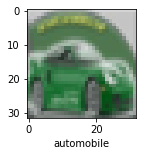

In [48]:
plot_sam(X_val,Y_val,1000)


Learning Rate = 0.001
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.9080 - accuracy: 0.3007
Epoch 2/5
1250/1250 [==============================] - 37s 30ms/step - loss: 1.7303 - accuracy: 0.3723
Epoch 3/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.6513 - accuracy: 0.4035
Epoch 4/5
1250/1250 [==============================] - 38s 31ms/step - loss: 1.5926 - accuracy: 0.4263
Epoch 5/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5454 - accuracy: 0.4428


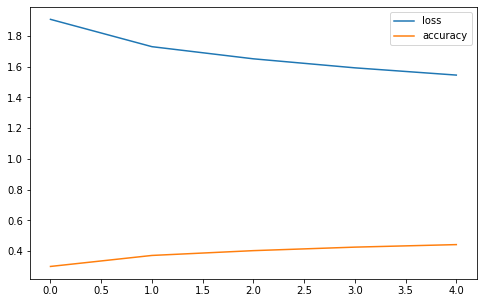

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 9s 29ms/step - loss: 1.5820 - accuracy: 0.4368
Epoch 2/5
313/313 [==============================] - 9s 30ms/step - loss: 1.5403 - accuracy: 0.4454
Epoch 3/5
313/313 [==============================] - 10s 32ms/step - loss: 1.4869 - accuracy: 0.4628
Epoch 4/5
313/313 [==============================] - 9s 30ms/step - loss: 1.4445 - accuracy: 0.4741
Epoch 5/5
313/313 [==============================] - 9s 29ms/step - loss: 1.4146 - accuracy: 0.4845


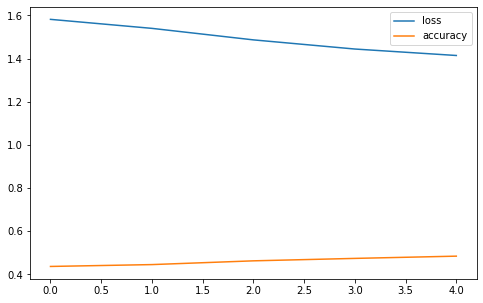

Learning Rate = 0.002
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 37s 29ms/step - loss: 1.6220 - accuracy: 0.4137
Epoch 2/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5837 - accuracy: 0.4321
Epoch 3/5
1250/1250 [==============================] - 37s 30ms/step - loss: 1.5575 - accuracy: 0.4388
Epoch 4/5
1250/1250 [==============================] - 37s 30ms/step - loss: 1.5270 - accuracy: 0.4500
Epoch 5/5
1250/1250 [==============================] - 37s 30ms/step - loss: 1.5172 - accuracy: 0.4546


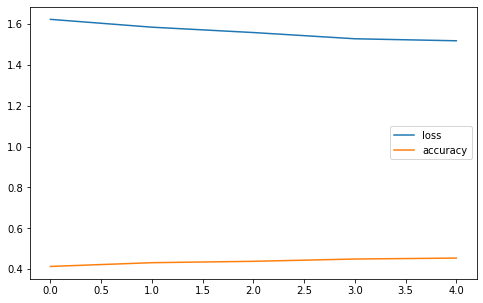

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 30ms/step - loss: 1.5526 - accuracy: 0.4473
Epoch 2/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5058 - accuracy: 0.4618
Epoch 3/5
313/313 [==============================] - 9s 29ms/step - loss: 1.4705 - accuracy: 0.4693
Epoch 4/5
313/313 [==============================] - 12s 39ms/step - loss: 1.4355 - accuracy: 0.4786
Epoch 5/5
313/313 [==============================] - 11s 34ms/step - loss: 1.4045 - accuracy: 0.4950


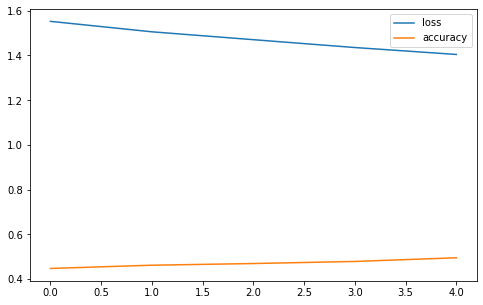

Learning Rate = 0.003
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 41s 32ms/step - loss: 1.6069 - accuracy: 0.4249
Epoch 2/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5731 - accuracy: 0.4370
Epoch 3/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5509 - accuracy: 0.4442
Epoch 4/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5478 - accuracy: 0.4436
Epoch 5/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5258 - accuracy: 0.4549


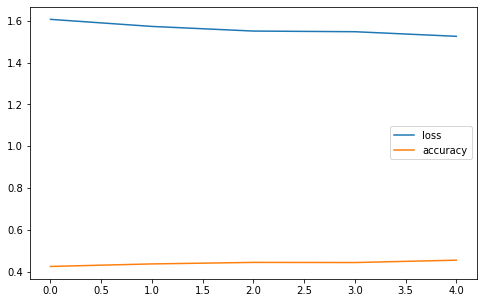

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5821 - accuracy: 0.4356
Epoch 2/5
313/313 [==============================] - 11s 34ms/step - loss: 1.5235 - accuracy: 0.4584
Epoch 3/5
313/313 [==============================] - 11s 34ms/step - loss: 1.4890 - accuracy: 0.4656
Epoch 4/5
313/313 [==============================] - 10s 32ms/step - loss: 1.4823 - accuracy: 0.4690
Epoch 5/5
313/313 [==============================] - 9s 30ms/step - loss: 1.4651 - accuracy: 0.4753


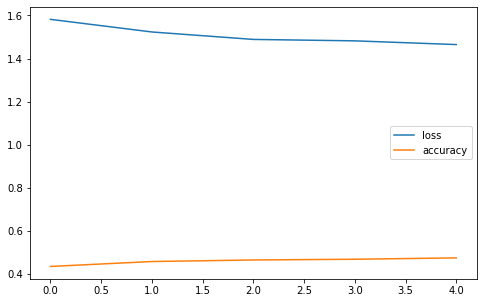

Learning Rate = 0.004
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 41s 32ms/step - loss: 1.6139 - accuracy: 0.4268
Epoch 2/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5788 - accuracy: 0.4374
Epoch 3/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5544 - accuracy: 0.4423
Epoch 4/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5568 - accuracy: 0.4441
Epoch 5/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5487 - accuracy: 0.4441


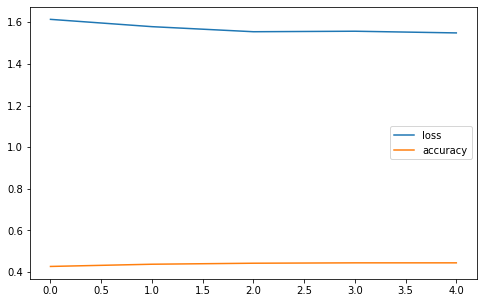

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5955 - accuracy: 0.4337
Epoch 2/5
313/313 [==============================] - 11s 34ms/step - loss: 1.5397 - accuracy: 0.4496
Epoch 3/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5230 - accuracy: 0.4571
Epoch 4/5
313/313 [==============================] - 10s 31ms/step - loss: 1.4940 - accuracy: 0.4600
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5064 - accuracy: 0.4598


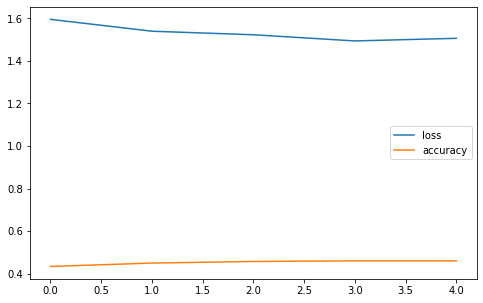

Learning Rate = 0.005
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 40s 31ms/step - loss: 1.6118 - accuracy: 0.4259
Epoch 2/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6181 - accuracy: 0.4231
Epoch 3/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5868 - accuracy: 0.4324
Epoch 4/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5808 - accuracy: 0.4335
Epoch 5/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.5810 - accuracy: 0.4362


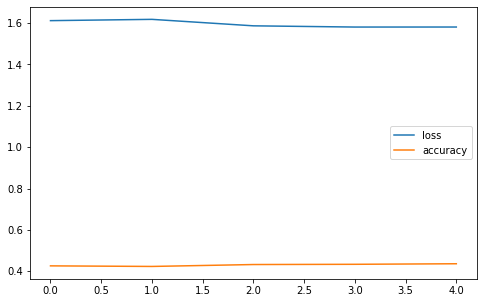

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 30ms/step - loss: 1.6067 - accuracy: 0.4352
Epoch 2/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5968 - accuracy: 0.4285
Epoch 3/5
313/313 [==============================] - 11s 34ms/step - loss: 1.5544 - accuracy: 0.4471
Epoch 4/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5432 - accuracy: 0.4513
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5304 - accuracy: 0.4560


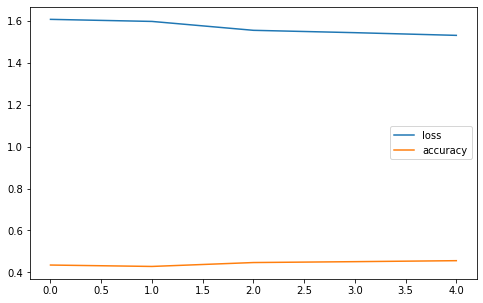

Learning Rate = 0.006
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6395 - accuracy: 0.4147
Epoch 2/5
1250/1250 [==============================] - 38s 31ms/step - loss: 1.6117 - accuracy: 0.4250
Epoch 3/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6119 - accuracy: 0.4259
Epoch 4/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.6257 - accuracy: 0.4196
Epoch 5/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.5950 - accuracy: 0.4302


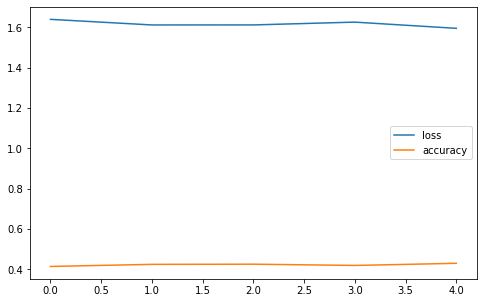

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 32ms/step - loss: 1.6052 - accuracy: 0.4303
Epoch 2/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5980 - accuracy: 0.4238
Epoch 3/5
313/313 [==============================] - 11s 34ms/step - loss: 1.5635 - accuracy: 0.4421
Epoch 4/5
313/313 [==============================] - 10s 30ms/step - loss: 1.5454 - accuracy: 0.4438
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.5385 - accuracy: 0.4460


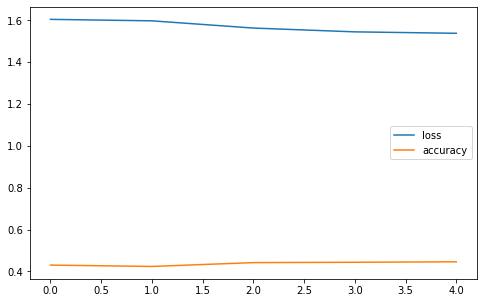

Learning Rate = 0.007
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.6408 - accuracy: 0.4144
Epoch 2/5
1250/1250 [==============================] - 38s 31ms/step - loss: 1.6848 - accuracy: 0.3990
Epoch 3/5
1250/1250 [==============================] - 38s 31ms/step - loss: 1.8309 - accuracy: 0.3416
Epoch 4/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.9360 - accuracy: 0.2560
Epoch 5/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.9406 - accuracy: 0.2272


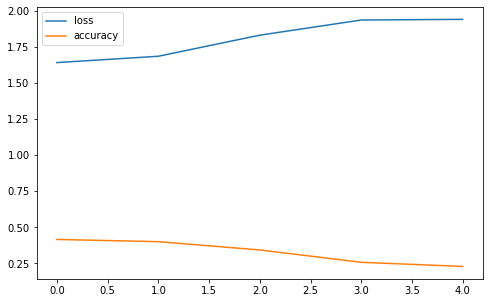

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 31ms/step - loss: 1.8555 - accuracy: 0.2912
Epoch 2/5
313/313 [==============================] - 10s 33ms/step - loss: 1.8322 - accuracy: 0.2914
Epoch 3/5
313/313 [==============================] - 10s 31ms/step - loss: 1.8274 - accuracy: 0.3154
Epoch 4/5
313/313 [==============================] - 10s 30ms/step - loss: 1.7728 - accuracy: 0.3314
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.7319 - accuracy: 0.3535


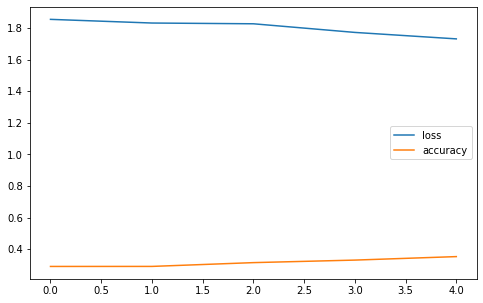

Learning Rate = 0.008
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 42s 33ms/step - loss: 1.7546 - accuracy: 0.3444
Epoch 2/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.7510 - accuracy: 0.3523
Epoch 3/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.7558 - accuracy: 0.3508
Epoch 4/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.7035 - accuracy: 0.3720
Epoch 5/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.6854 - accuracy: 0.3843


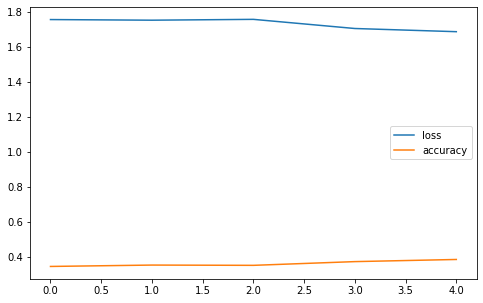

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 32ms/step - loss: 1.6905 - accuracy: 0.3736
Epoch 2/5
313/313 [==============================] - 10s 32ms/step - loss: 1.6785 - accuracy: 0.3831
Epoch 3/5
313/313 [==============================] - 10s 32ms/step - loss: 1.7173 - accuracy: 0.3764
Epoch 4/5
313/313 [==============================] - 12s 37ms/step - loss: 1.6735 - accuracy: 0.3859
Epoch 5/5
313/313 [==============================] - 11s 34ms/step - loss: 1.6523 - accuracy: 0.3923


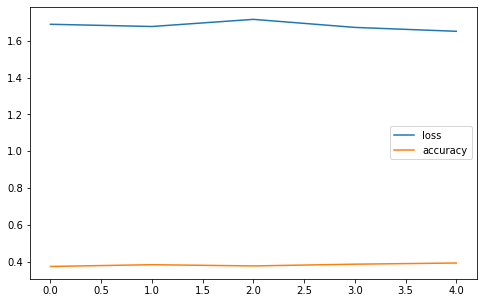

Learning Rate = 0.009
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 41s 33ms/step - loss: 1.7166 - accuracy: 0.3636
Epoch 2/5
1250/1250 [==============================] - 44s 35ms/step - loss: 1.7017 - accuracy: 0.3726
Epoch 3/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.7308 - accuracy: 0.3589
Epoch 4/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6981 - accuracy: 0.3715
Epoch 5/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.6795 - accuracy: 0.3802


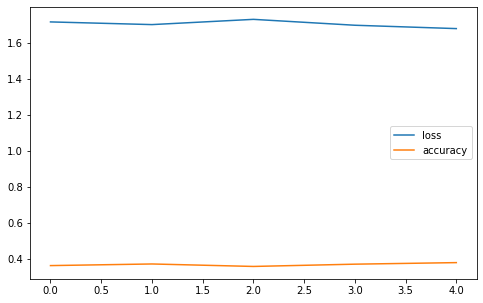

Validation Loss and Accuracy
Epoch 1/5
313/313 [==============================] - 10s 31ms/step - loss: 1.7018 - accuracy: 0.3722
Epoch 2/5
313/313 [==============================] - 11s 34ms/step - loss: 1.6823 - accuracy: 0.3787
Epoch 3/5
313/313 [==============================] - 10s 31ms/step - loss: 1.6546 - accuracy: 0.3836
Epoch 4/5
313/313 [==============================] - 10s 32ms/step - loss: 1.6773 - accuracy: 0.3769
Epoch 5/5
313/313 [==============================] - 10s 31ms/step - loss: 1.7684 - accuracy: 0.3249


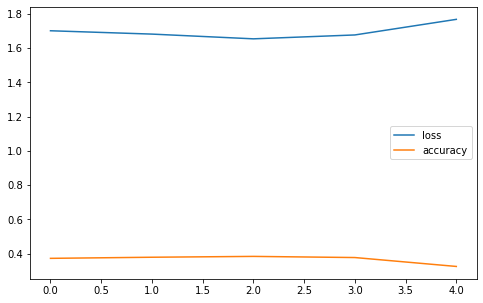

Learning Rate = 0.01
Training Loss and Accuracy
Epoch 1/5
1250/1250 [==============================] - 42s 33ms/step - loss: 1.7462 - accuracy: 0.3513
Epoch 2/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.7443 - accuracy: 0.3513
Epoch 3/5
1250/1250 [==============================] - 40s 32ms/step - loss: 1.7624 - accuracy: 0.3447
Epoch 4/5
1250/1250 [==============================] - 39s 31ms/step - loss: 1.7484 - accuracy: 0.3426
Epoch 5/5
 730/1250 [================>.............] - ETA: 15s - loss: 1.8222 - accuracy: 0.3054

In [ ]:
import pandas as pd 
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                         layers.Flatten(),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(400, activation = 'relu'),
                         layers.Dense(300, activation = 'relu'),
                         layers.Dense(200, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')
])
epochs = [1,2,3,4,5]
lr = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008 , 0.009,0.01]
for i in lr:
  print('Learning Rate =',i)
  ann.compile(tf.keras.optimizers.Adam(learning_rate = i),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
  print('Training Loss and Accuracy')
  history =ann.fit(X_train, Y_train, epochs = 5)
  pd.DataFrame(history.history).plot(figsize=(8,5))
  plt.show()

  print('Validation Loss and Accuracy')
  history2 = ann.fit(X_val, Y_val, epochs = 5)
  pd.DataFrame(history2.history).plot(figsize=(8,5))
  plt.show()
  # plt.plot(history.history['acc'])
  # plt.plot(history2.history['acc'])
  # plt.title('model accuracy')
  # plt.ylabel('accuracy')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()

  # plt.plot(history.history['loss'])
  # plt.plot(history2.history['loss'])
  # plt.title('model loss')
  # plt.ylabel('loss')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()


In [ ]:
# ann.evaluate(X_test,Y_test)